## Importing Libraries & Understanding Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
# Load Dataset for train
os.chdir("D:/Imarticus/Supervised Learning/Linear Regression with SGD/Vehicle Performance Prediction/Dataset")
df=pd.read_csv('D:/Imarticus/Supervised Learning/Linear Regression with SGD/Vehicle Performance Prediction/Dataset/data.csv')

In [3]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [4]:
df.value_counts()

origin  cylinders  displacement  horsepower  weight  acceleration  year  name                               Kilometer_per_liter
1       4          85.0          52          2035    22.2          1976  chevrolet chevette                 12.329168              1
2       4          97.0          71          1825    12.2          1976  volkswagen rabbit                  12.541739              1
                                 54          2254    23.5          1972  volkswagen type 3                  9.778305               1
                                 52          2130    24.6          1982  vw pickup                          18.706323              1
                                 46          1950    21.0          1973  volkswagen super beetle            11.053736              1
                                                                                                                                  ..
1       6          250.0         105         3897    18.5          1975  c

In [5]:
df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
132     1
148     1
133     1
102     1
137     1
Name: horsepower, Length: 94, dtype: int64

In [6]:
df['horsepower'].dtype

dtype('O')

In [7]:
# replace ? with nan
df.replace('?',np.nan,inplace=True)
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [8]:
avg_hr=df['horsepower'].astype('float').mean(axis=0)
avg_hr

104.46938775510205

In [9]:
df.horsepower=df.horsepower.astype('float')

In [10]:
df['horsepower'].replace(np.nan,avg_hr,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 26.5+ KB


In [12]:
df.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,104.469388,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,76.000000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 26.5+ KB


In [14]:
# Let's Check the missing data if any 
# Gives the list of columns which have only null values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [15]:
df.isnull().any()

origin                 False
cylinders              False
displacement           False
horsepower             False
weight                 False
acceleration           False
year                   False
name                   False
Kilometer_per_liter    False
dtype: bool

#### Check Skewness

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


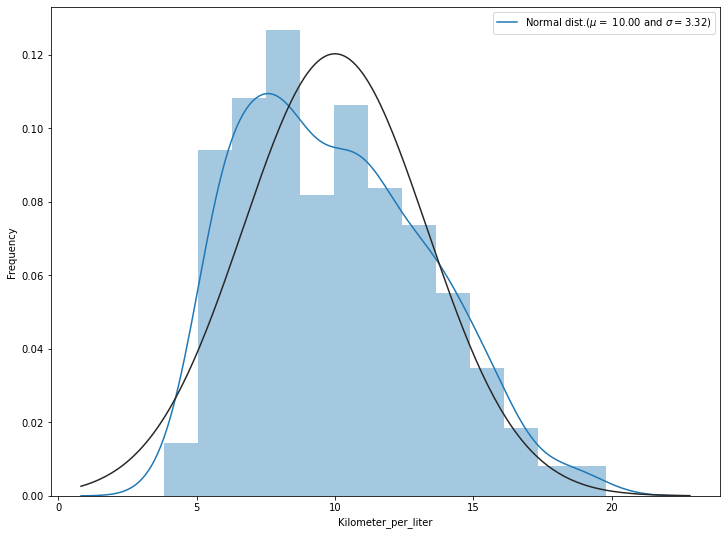

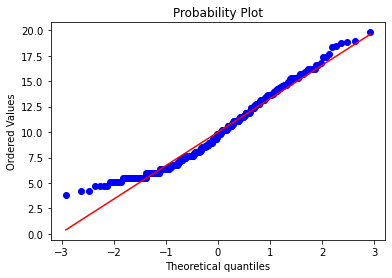

In [16]:
plt.subplots(figsize =(12,9))
sns.distplot(df['Kilometer_per_liter'], fit=stats.norm)

# get the fitted parameters used by the function
(mu,sigma)=stats.norm.fit(df['Kilometer_per_liter'])

# Plot with the distribution
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

# Probability Plot
fig=plt.figure()
stats.probplot(df['Kilometer_per_liter'],plot=plt)
plt.show()

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


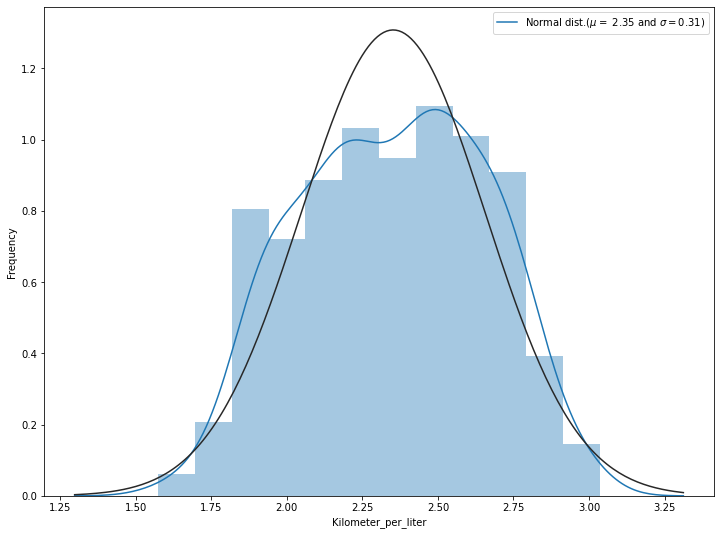

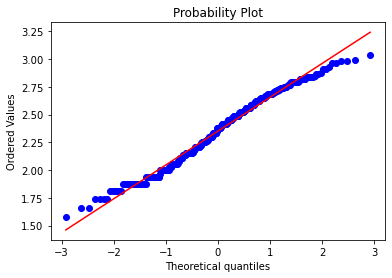

In [17]:
# we use log which is a part of numpy library
df['Kilometer_per_liter']=np.log1p(df['Kilometer_per_liter'])

plt.subplots(figsize =(12,9))
sns.distplot(df['Kilometer_per_liter'], fit=stats.norm)

# get the fitted parameters used by the function
(mu,sigma)=stats.norm.fit(df['Kilometer_per_liter'])

# Plot with the distribution
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

# Probability Plot
fig=plt.figure()
stats.probplot(df['Kilometer_per_liter'],plot=plt)
plt.show()

## Label Encoding

In [18]:
df_cat=df.select_dtypes(include='object').columns # Seperarting categorical Variables

In [19]:
# Label encoding Categorical Variables
for c in df_cat:
    lbl=LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c]=lbl.transform(list(df[c].values))

In [20]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,49,2.157858
1,1,8,350.0,165.0,3693,11.5,1970,36,1.998388
2,1,8,318.0,150.0,3436,11.0,1970,231,2.157858
3,1,8,304.0,150.0,3433,12.0,1970,14,2.054418
4,1,8,302.0,140.0,3449,10.5,1970,161,2.107475
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,153,2.524038
394,2,4,97.0,52.0,2130,24.6,1982,301,2.980940
395,1,4,135.0,84.0,2295,11.6,1982,119,2.681336
396,1,4,120.0,79.0,2625,18.6,1982,159,2.557539


## Expolarity analysis 

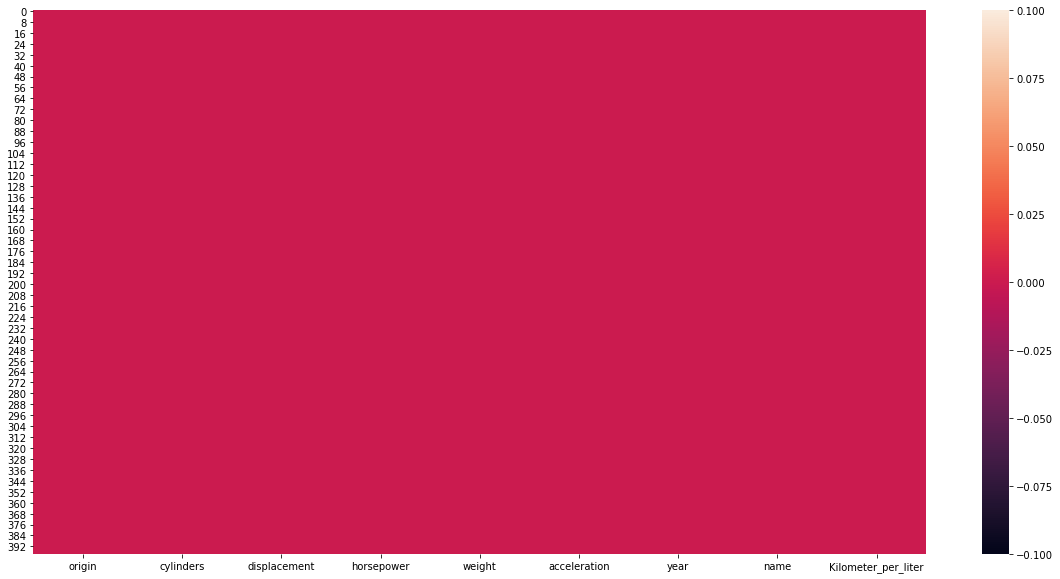

In [21]:
# plot of missing value attributes
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [22]:
#Missing value Count in each of the columns
# Percentage of null values in the dataset 
Isnull=df.isnull().sum()/len(df)*100
Isnull=Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Series([], dtype: float64)

<AxesSubplot:>

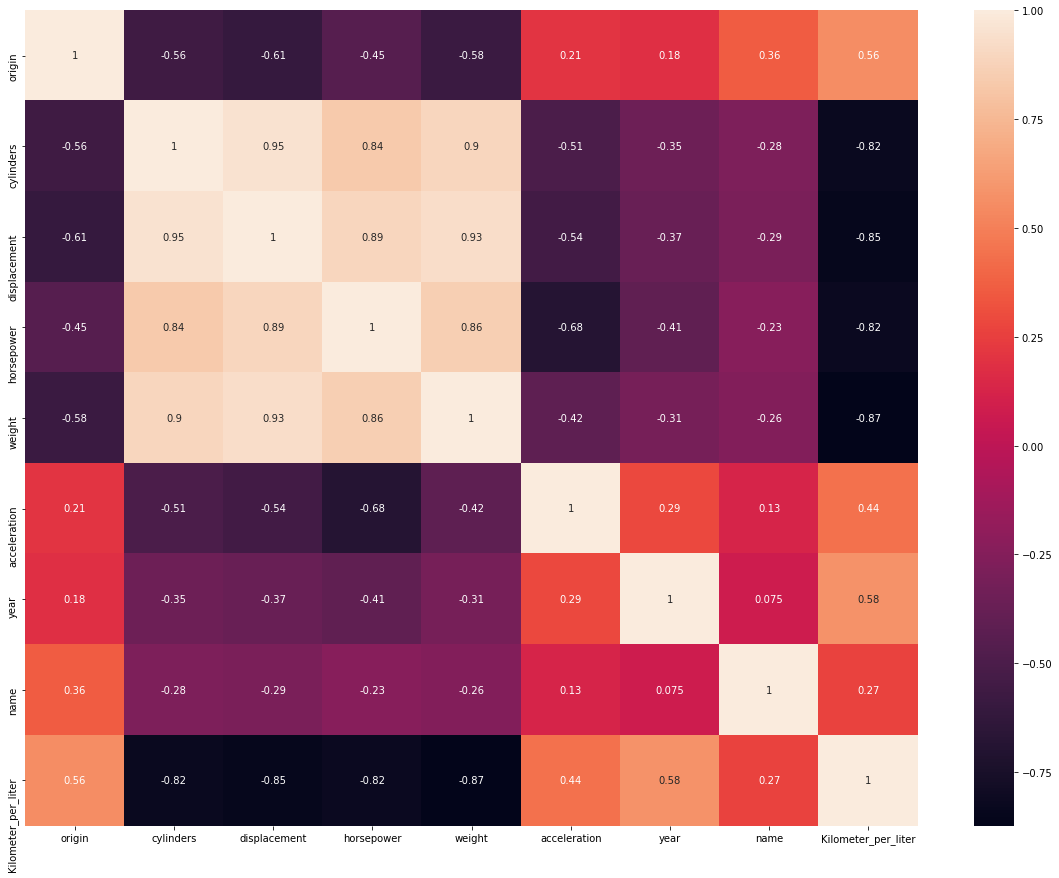

In [23]:
# Correlation Plot
corr=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [24]:
corr[corr['Kilometer_per_liter']>0.5]

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,0.360058,0.560084
year,0.180662,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.074761,0.577211
Kilometer_per_liter,0.560084,-0.822682,-0.850550,-0.820539,-0.872846,0.443890,0.577211,0.268177,1.000000


In [25]:
corr[corr['Kilometer_per_liter']>0.5]['Kilometer_per_liter']

origin                 0.560084
year                   0.577211
Kilometer_per_liter    1.000000
Name: Kilometer_per_liter, dtype: float64

In [26]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


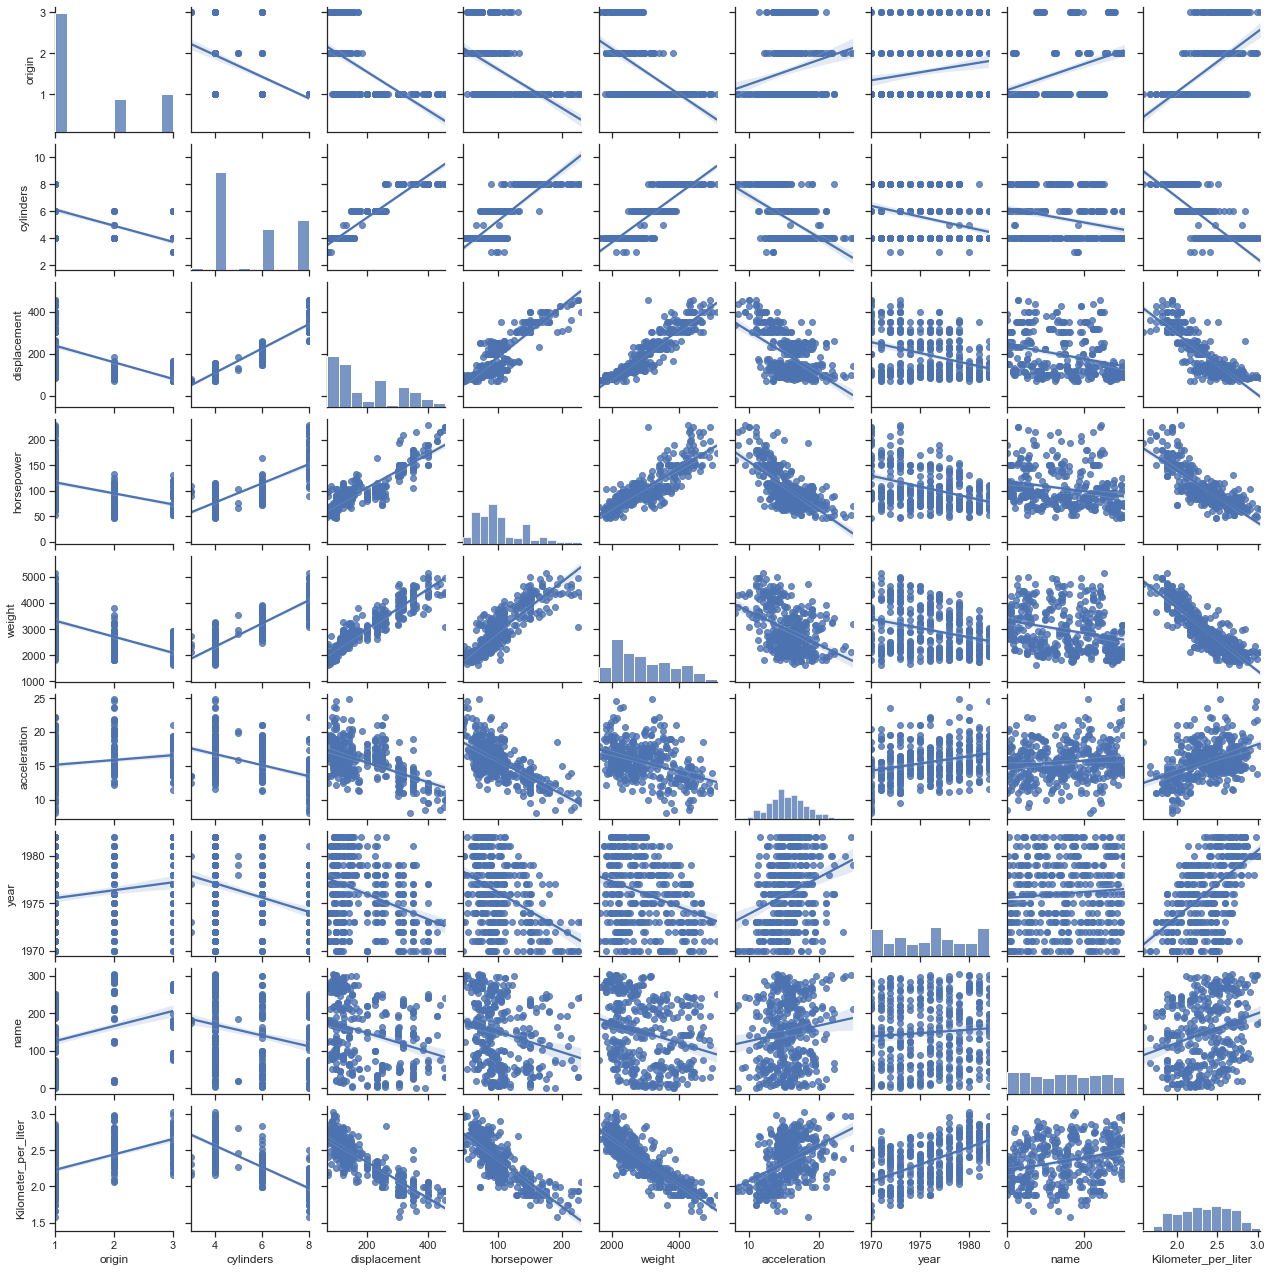

In [27]:

col=['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter']
sns.set(style='ticks')
sns.pairplot(df[col],size=2,kind='reg')

#### Checking the R^2 for base model using Linear Regression 

In [28]:
# Prepare data for prediction
Y=df['Kilometer_per_liter']
X=df.drop(['Kilometer_per_liter'],axis=1)

In [29]:
# Take The value as X and Y
x=X.values
y=Y.values

In [30]:
#Split data into train and test format
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [31]:
#perform Linear regression
model=LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
# Making Prediction using the model
y_pred=model.predict(x_test)

In [34]:
# prediction for a single data point
print('Predict Value',(model.predict([x_test[70]])))
print('Actual Value',(y_test[70]))

Predict Value [2.28015398]
Actual Value 2.412419699645886


In [35]:
mse=mean_squared_error(y_test,y_pred)
r_sqaured = r2_score(y_test, y_pred)
rmse=sqrt(mse)

In [36]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 0.014906773179220924
Root_Mean_Sqaured_Erro: 0.12209329702821906
r_sqaure_value: 0.802743945669468


C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


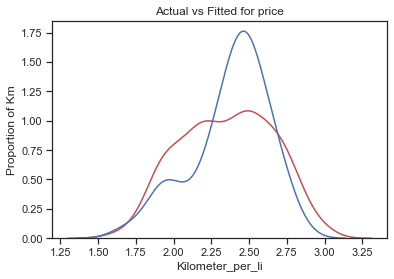

In [37]:
#distribution plot to compare actual vs predicted values for price after few modification.
ax1=sns.distplot(Y,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Kilometer_per_li')
plt.ylabel('Proportion of Km')
plt.show()

#### To improve the above model 

#### So, We need Scaling and standardisation for our model as because of different variable units.

### Scaling and standardisation

In [38]:
scale=StandardScaler()

In [39]:
x_sc=scale.fit_transform(df[['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name']])

In [40]:
model.sc=model.fit(x_sc,df['Kilometer_per_liter'])

In [41]:
yhat_sc=model.predict(x_sc)

In [42]:
print('R Squared using polynomial Regression:',r2_score(df['Kilometer_per_liter'],yhat_sc))
print('Mean Squared errorusing Polynomial Regerssion:',mean_squared_error(df['Kilometer_per_liter'],yhat_sc))
print('Root mean Squared error using Polynomial Regression:',np.sqrt(mean_squared_error(df['Kilometer_per_liter'],yhat_sc)))

R Squared using polynomial Regression: 0.8767231333699147
Mean Squared errorusing Polynomial Regerssion: 0.011477552357723448
Root mean Squared error using Polynomial Regression: 0.10713333915137457


C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


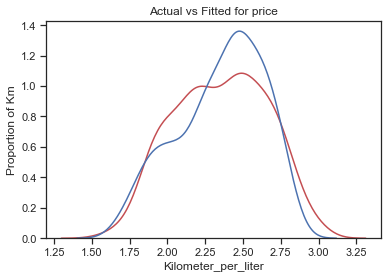

In [43]:
#distribution plot to compare actual vs predicted values for price after few modification.
ax1=sns.distplot(df['Kilometer_per_liter'],hist=False,color='r',label='Actual Value')
sns.distplot(yhat_sc,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Kilometer_per_liter')
plt.ylabel('Proportion of Km')
plt.show()

#### Now we Need to transform the model into Polynomial regresssion

## Polynomial Regression

In [44]:
pr= PolynomialFeatures(degree=2)

In [45]:
train_pr=pr.fit_transform(x_test)

In [46]:
model_pr=model.fit(train_pr,y_test)

In [47]:
yhat_pr=model.predict(train_pr)

In [48]:
yhat_pr[0:5]

array([2.48032345, 2.38912285, 2.83863196, 2.58802815, 2.77490718])

In [49]:
y_test[0:5]

array([2.48937469, 2.33729194, 2.75699824, 2.62135232, 2.61515116])

In [50]:
print('R Squared using Polynomial Regression:',r2_score(y_test,yhat_pr))
print('Mean Squared errorusing Polynomial Regerssion:',mean_squared_error(y_test,yhat_pr))
print('Root mean Squared error using Polynomial Regression:',np.sqrt(mean_squared_error(y_test,yhat_pr)))

R Squared using Polynomial Regression: 0.8976848653046621
Mean Squared errorusing Polynomial Regerssion: 0.0077320237945607455
Root mean Squared error using Polynomial Regression: 0.08793192704905736


C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


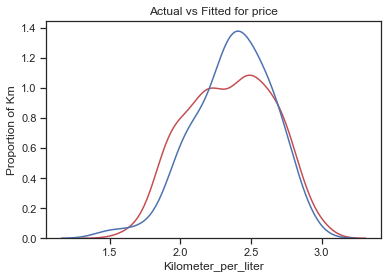

In [51]:
#distribution plot to compare actual vs predicted values for km/lit after few modification.
ax1=sns.distplot(df['Kilometer_per_liter'],hist=False,color='r',label='Actual Value')
sns.distplot(yhat_pr,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Kilometer_per_liter')
plt.ylabel('Proportion of Km')
plt.show()

### Note:- We can see predicted vs data dependent plot above.

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


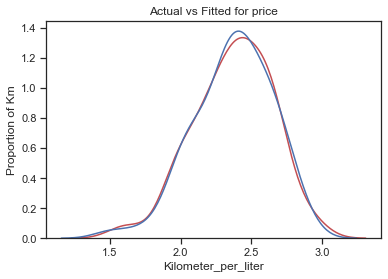

In [52]:
#distribution plot to compare actual vs predicted values for km/lit after few modification.
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(yhat_pr,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Kilometer_per_liter')
plt.ylabel('Proportion of Km')
plt.show()

### Note:- We can see predicted vs Y_test plot above.

### Cross Validation 

In [54]:
Rcross= cross_val_score(model,x_test,y_test ,cv=4)
Rcross

array([0.74717156, 0.81297984, 0.63668538, 0.75675808])